#◢ DeOldify - Colorize your own videos!


_FYI: This notebook is intended as a tool to colorize gifs and short videos, if you are trying to convert longer video you may hit the limit on processing space. Running the Jupyter notebook on your own machine is recommended (and faster) for larger video sizes._

####**Credits:**

Big special thanks to:

Robert Bell for all his work on the video Colab notebook, and paving the way to video in DeOldify!

Dana Kelley for doing things, breaking stuff & having an opinion on everything.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


In [0]:
from os import path
import torch

#◢ Git clone and install DeOldify

In [0]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1887 (delta 4), reused 7 (delta 2), pack-reused 1877
Receiving objects: 100% (1887/1887), 69.25 MiB | 28.70 MiB/s, done.
Resolving deltas: 100% (814/814), done.


In [0]:
cd DeOldify

/content/DeOldify


#◢ Setup

In [0]:
!pip install -r requirements.txt

     |████████████████████████████████| 215kB 3.5MB/s 
     |████████████████████████████████| 133kB 41.8MB/s 
     |████████████████████████████████| 1.8MB 44.3MB/s 
     |████████████████████████████████| 15.3MB 33.0MB/s 
     |████████████████████████████████| 61kB 25.6MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6085 sha256=fd9c4bac00c8dd07fe5e4ce282bf2958b758e41c0d173302a90bbbb1efa5e17c
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg
  Found existing installation: fastai 1.0.58
    Uninstalling fastai-1.0.58:
      Successfully uninstalled fastai-1.0.58
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [0]:
import fastai
from deoldify.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:06<00:00, 86.3MB/s]


In [0]:
!mkdir 'models'
!wget https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0 -O ./models/ColorizeVideo_gen.pth

--2019-10-11 17:34:36--  https://www.dropbox.com/s/336vn9y4qwyg9yz/ColorizeVideo_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth [following]
--2019-10-11 17:34:37--  https://www.dropbox.com/s/raw/336vn9y4qwyg9yz/ColorizeVideo_gen.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c243ab4de2a49f438dd060416.dl.dropboxusercontent.com/cd/0/inline/AqPIDeAKouqSoViaE7ag6P_yJ8KQImE7TF-mWttxjP1VbSSp3WGFXMfy8SFL9kV_rvj5gj_9lGVLmBUb7RErALj2uVupPuG-YtxXxyQ2PZXsZA/file# [following]
--2019-10-11 17:34:37--  https://uc6c243ab4de2a49f438dd060416.dl.dropboxusercontent.com/cd/0/inline/AqPIDeAKouqSoViaE7ag6P_yJ8KQImE7TF-mWttxjP1VbSSp3WGFXMfy8SFL9kV_rvj5gj_9lGVLmBUb7RErALj2uVupPuG-YtxXxyQ

In [0]:
colorizer = get_video_colorizer()

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:442: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:445: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:02<00:00, 69.5MB/s]


#◢ Instructions

### source_url
Type in a url hosting a video from YouTube, Imgur, Twitter, Reddit, Vimeo, etc.  Many sources work!  GIFs also work.  Full list here: https://ytdl-org.github.io/youtube-dl/supportedsites.html NOTE: If you want to use your own video, upload it first to a site like YouTube. 

### render_factor
The default value of 21 has been carefully chosen and should work -ok- for most scenarios (but probably won't be the -best-). This determines resolution at which the color portion of the video is rendered. Lower resolution will render faster, and colors also tend to look more vibrant. Older and lower quality film in particular will generally benefit by lowering the render factor. Higher render factors are often better for higher quality videos and inconsistencies (flashy render) will generally be reduced, but the colors may get slightly washed out. 

### How to Download a Copy
Simply right click on the displayed video and click "Save video as..."!

## Pro Tips
1. If a video takes a long time to render and you're wondering how well the frames will actually be colorized, you can preview how well the frames will be rendered at each render_factor by using the code at the bottom. Just stop the video rendering by hitting the stop button on the cell, then run that bottom cell under "See how well render_factor values perform on a frame here". It's not perfect and you may still need to experiment a bit especially when it comes to figuring out how to reduce frame inconsistency.  But it'll go a long way in narrowing down what actually works.
2. If videos are taking way too much time for your liking, running the Jupyter notebook VideoColorizer.ipynb on your own machine (with DeOldify installed) will generally be much faster (as long as you have the hardware for it).   

## Troubleshooting
The video player may wind up not showing up, in which case- make sure to wait for the Jupyter cell to complete processing first (the play button will stop spinning).  Then follow these alternative download instructions

1. In the menu to the left, click Files
2. If you don't see the 'DeOldify' folder, click "Refresh"
3. By default, rendered video will be in /DeOldify/video/result/

If a video you downloaded doesn't play, it's probably because the cell didn't complete processing and the video is in a half-finished state.

If you get a 'CUDA out of memory' error, you probably have the render_factor too high. The max is 44 on 11GB video cards.

#◢ Colorize!!

In [0]:
source_url = 'https://twitter.com/i/status/1180017205934788608' #@param {type:"string"}
render_factor = 21  #@param {type: "slider", min: 5, max: 44}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

[twitter] 1180017205934788608: Downloading webpage
[twitter:card] 1180017205934788608: Downloading webpage
[twitter:card] 1180017205934788608: Downloading guest token
[twitter:card] 1180017205934788608: Downloading JSON metadata
[download] Destination: video/source/video.mp4
[download] 100% of 332.15KiB in 00:00


Video created here: video/result/video.mp4


## See how well render_factor values perform on a frame here

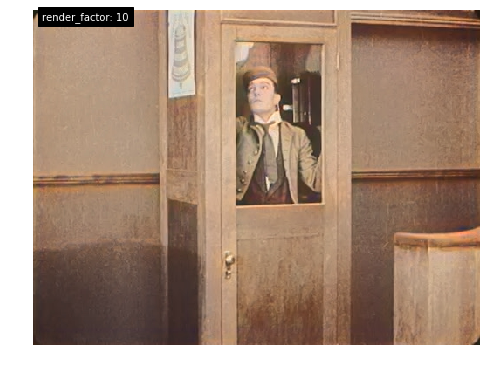

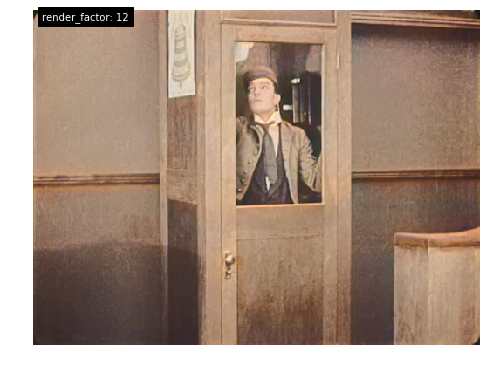

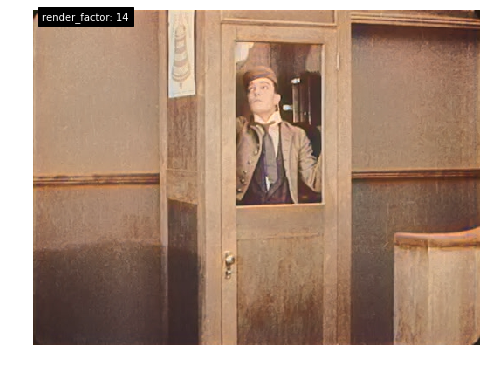

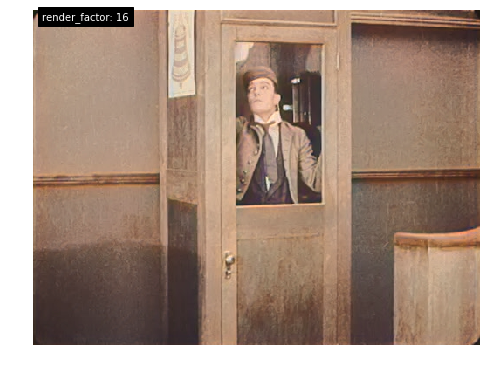

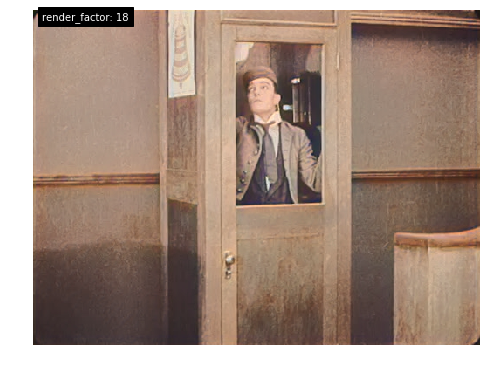

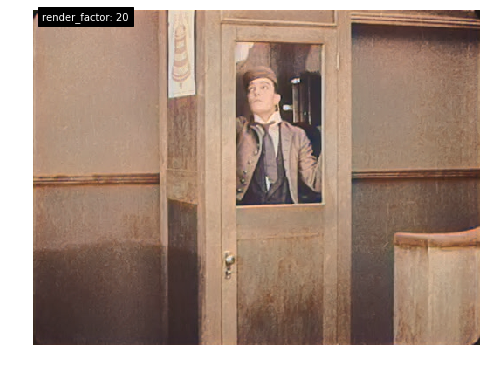

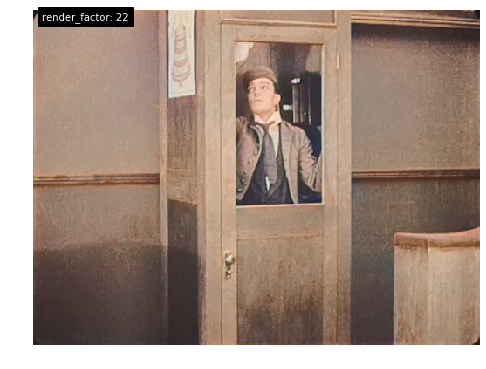

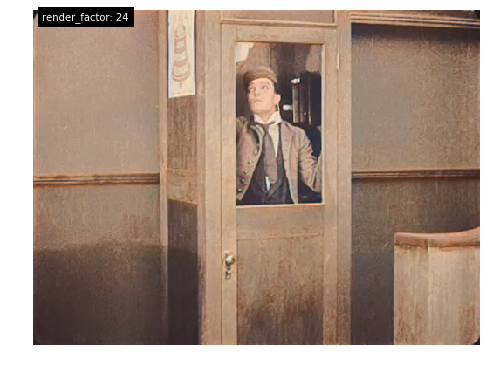

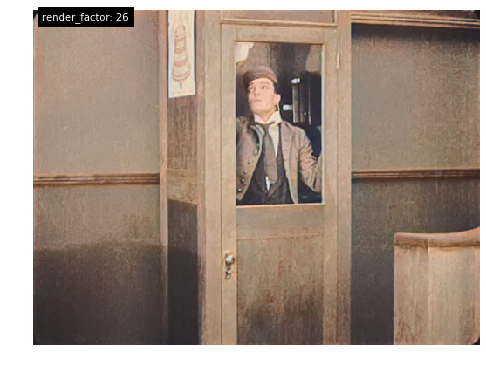

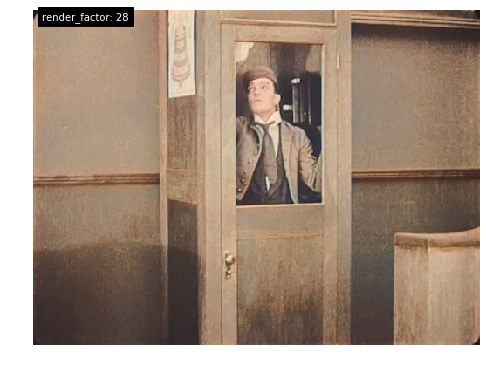

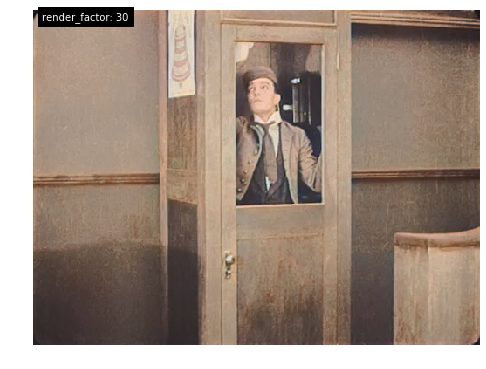

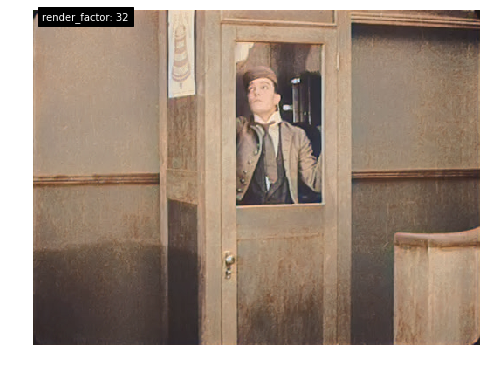

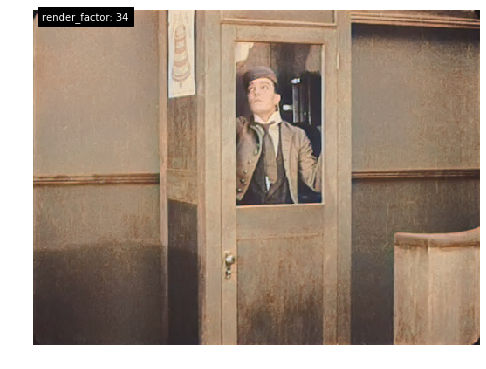

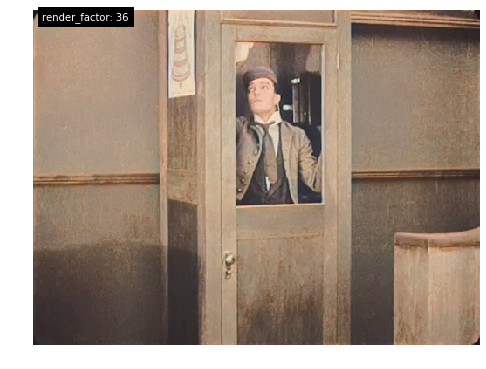

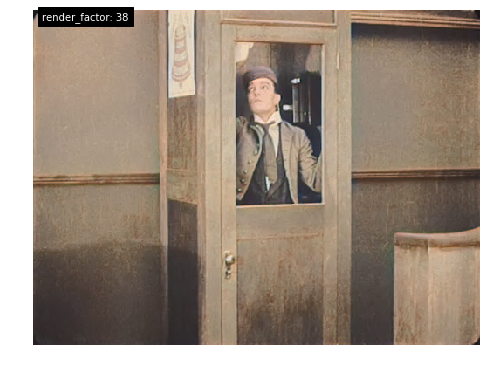

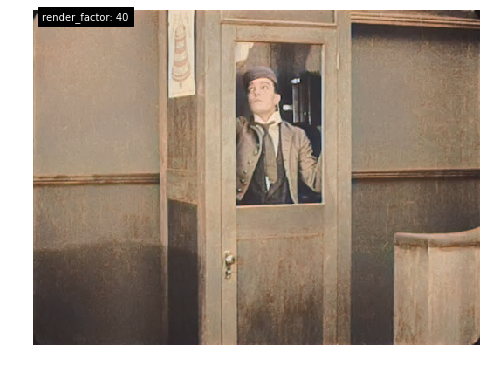

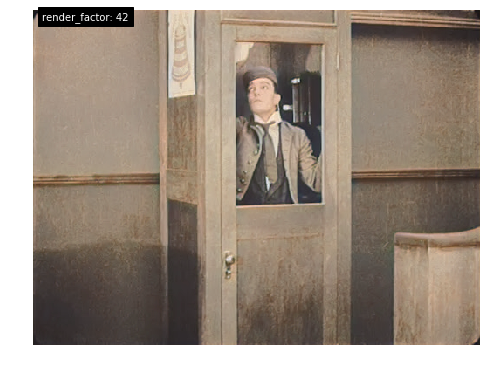

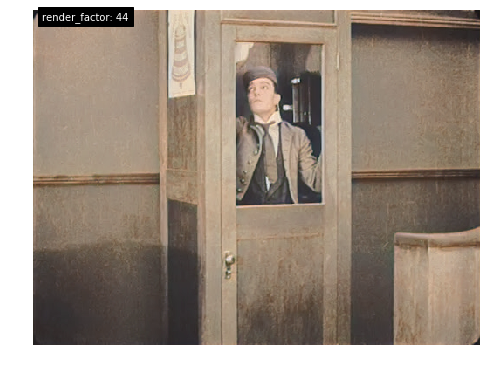

In [0]:
for i in range(10,45,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))

---
#⚙ Recommended video and gif sources 
* [/r/Nickelodeons/](https://www.reddit.com/r/Nickelodeons/)
* [r/silentmoviegifs](https://www.reddit.com/r/silentmoviegifs/)
* https://twitter.com/silentmoviegifs 